# <b>  CSV Preprocessing</b>


# Steps

1. Importing necessary libraries and loading dataset
2. Perform EDA to understand variations in data and delete unnecessary features
3. Dealing with missing data
4. Encoding Categorical Data
5. Splitting Data
6. Feature Scaling<br><br>
Dimensionality Reduction using PCA or kernel PCA is a topic for further exploration

# 1. Importing necessary libraries and loading dataset

* pandas is needed for loading the dataset
* numpy is needed to perform mathematical operations on data
* matplotlib.pyplot is needed to visualise properties of data shown in the form of graphs
* SimpleImputer is used to fit in missing values in the dataset
* LabelEncoder is used to convert output column into 0,1,2 instead of 3 words
* OneHotEncoder is used to add dummy variable columns for variable occupying specific discrete values
* train_test_split is used to split dataset into train and test sets
* StandardScaler is used for Feature Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset=pd.read_csv("/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv")

# 2. Performing Exploratory Data Analysis

In [3]:
rows,columns = dataset.shape
print(f"Number of rows/examples: {rows}")
print(f"Number of columns/features: {columns}")

Number of rows/examples: 100000
Number of columns/features: 18


In [4]:
print(f"Examples       {rows}")
print("---------------------")
#unique=dict(zip(columns,dataset.nunique()))
unique=dataset.nunique()
print(unique)

Examples       100000
---------------------
obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64


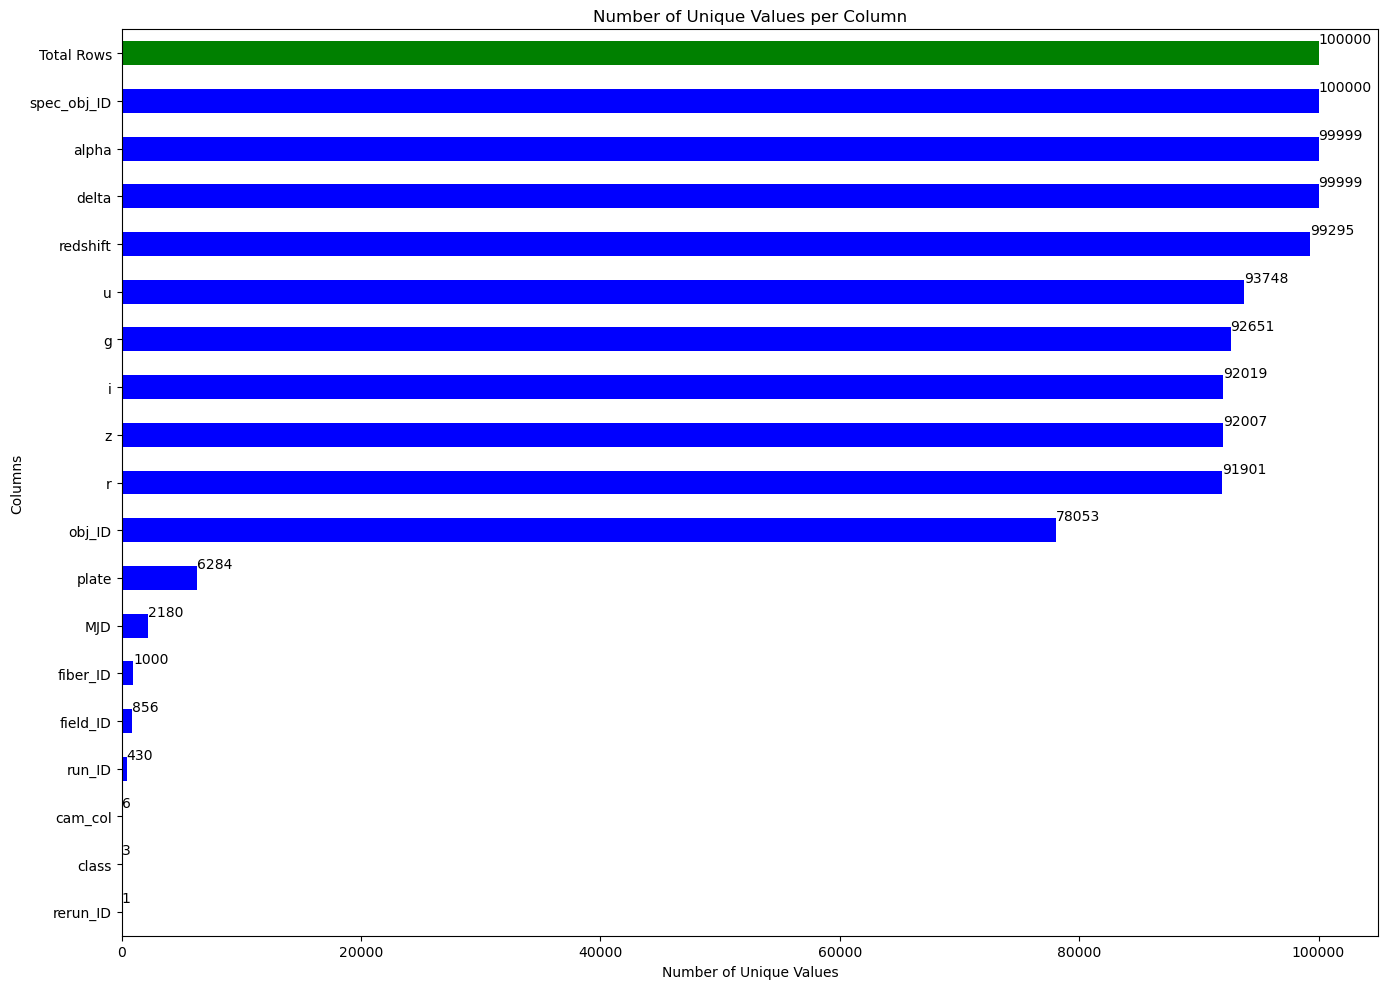

In [5]:
unique["Total Rows"] = rows

plt.figure(figsize=(14, 10))
ax = unique.sort_values().plot(kind="barh", color=['blue' if c != "Total Rows" else 'green' for c in unique.index])
plt.title("Number of Unique Values per Column")
plt.ylabel("Columns")
plt.xlabel("Number of Unique Values")

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 5, p.get_y() + p.get_height() / 2.),
                va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

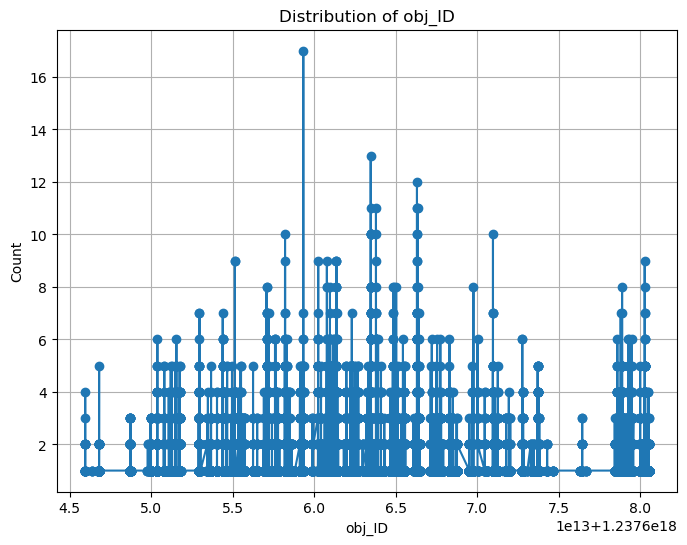

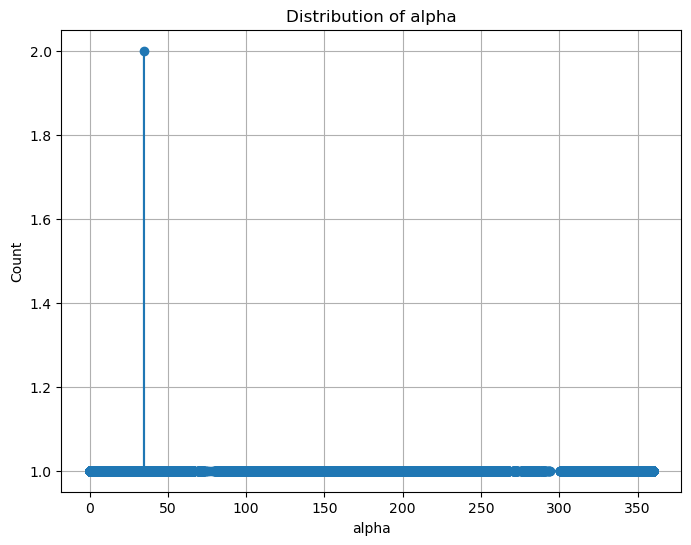

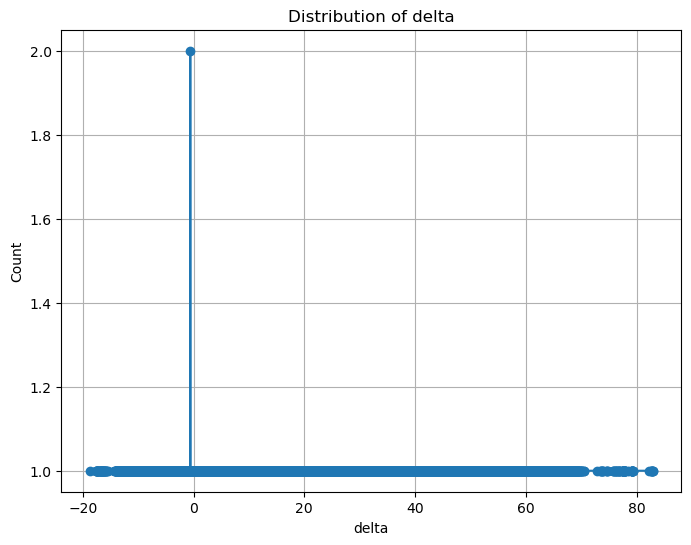

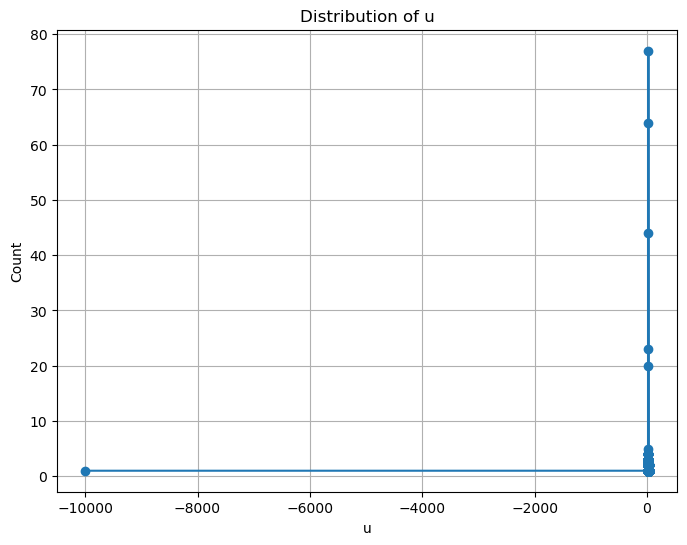

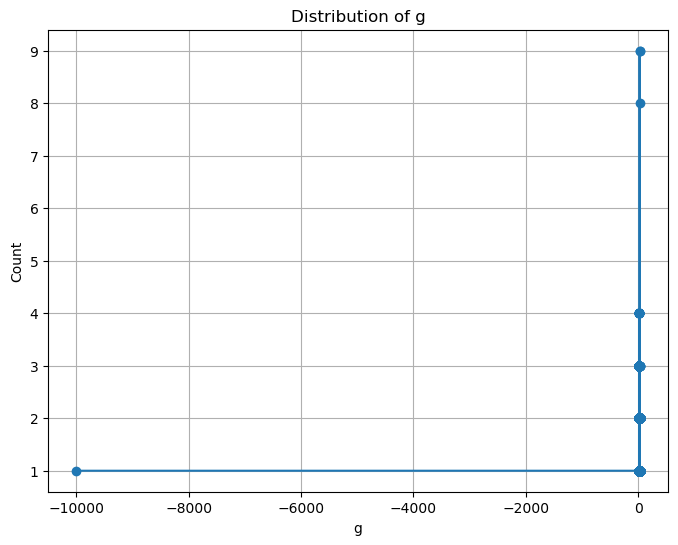

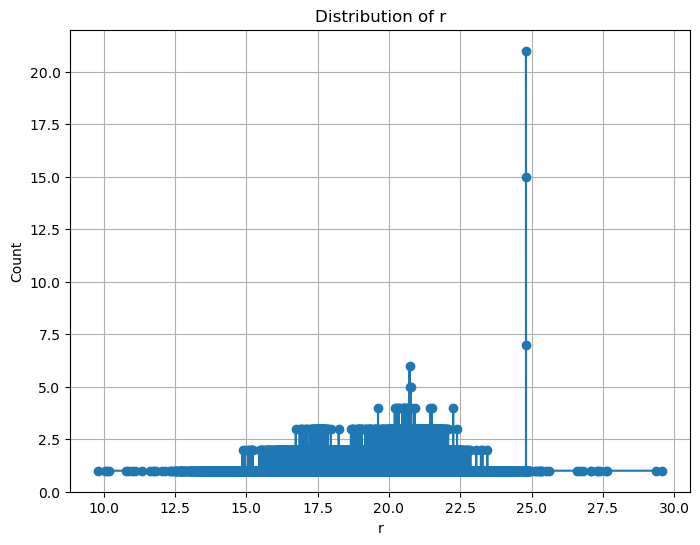

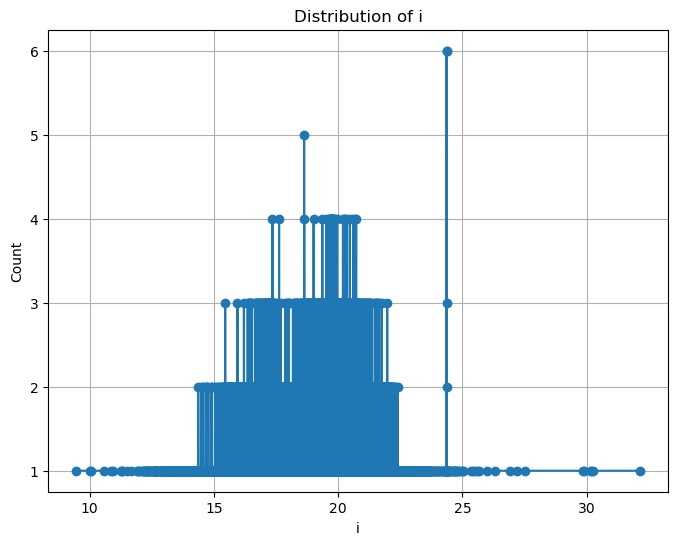

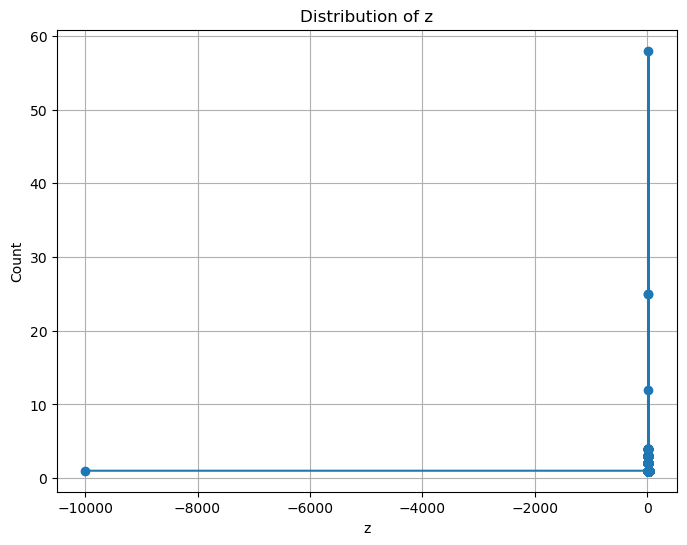

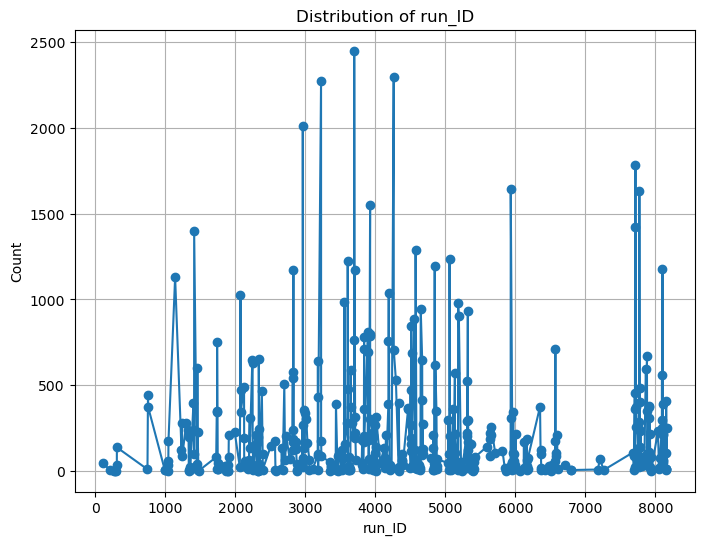

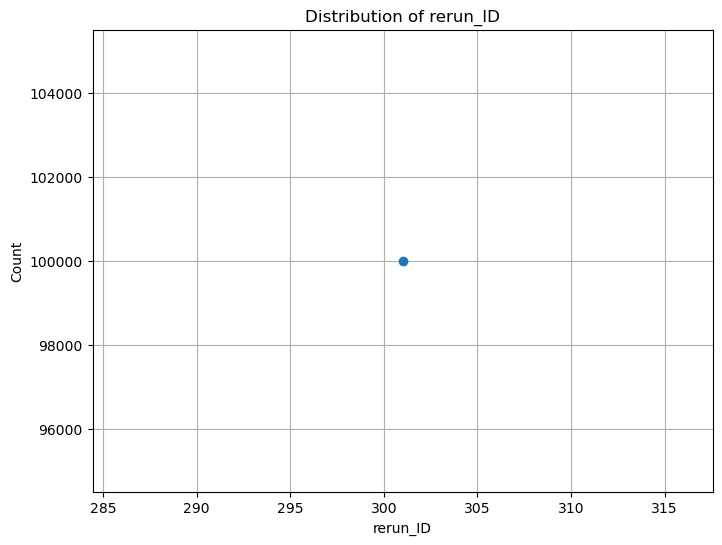

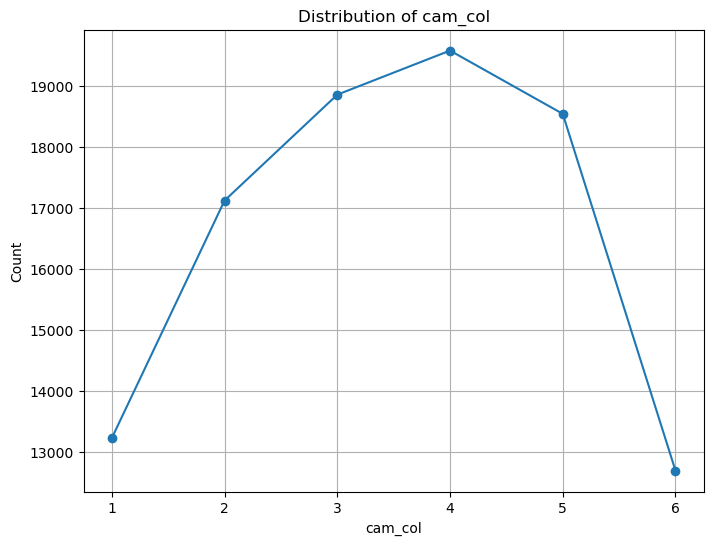

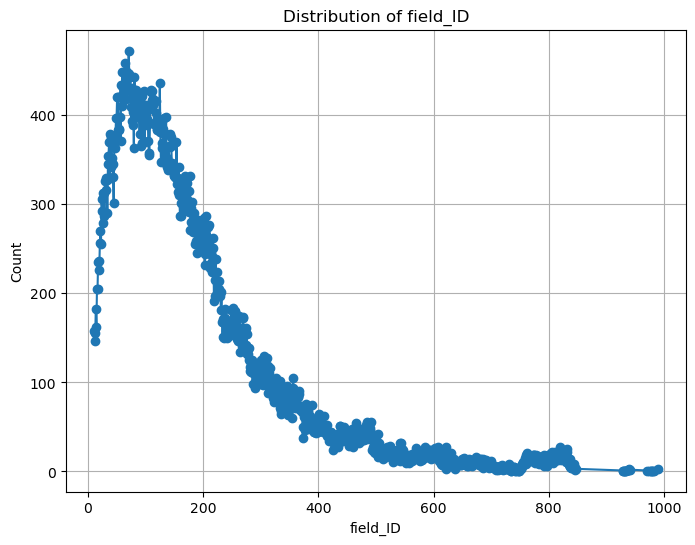

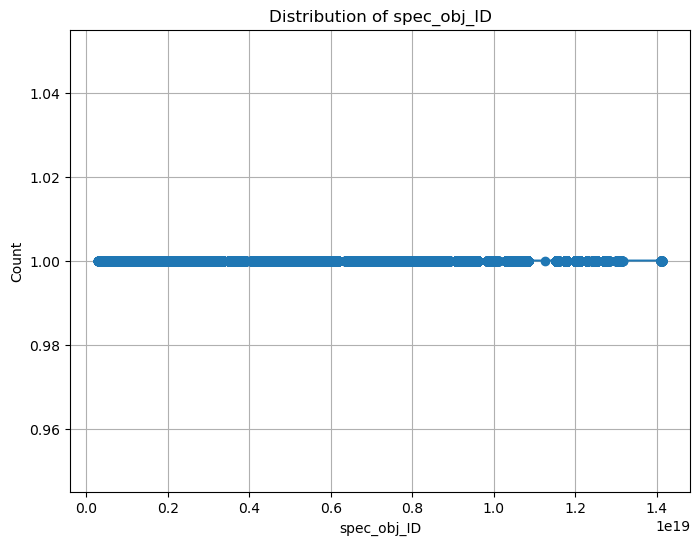

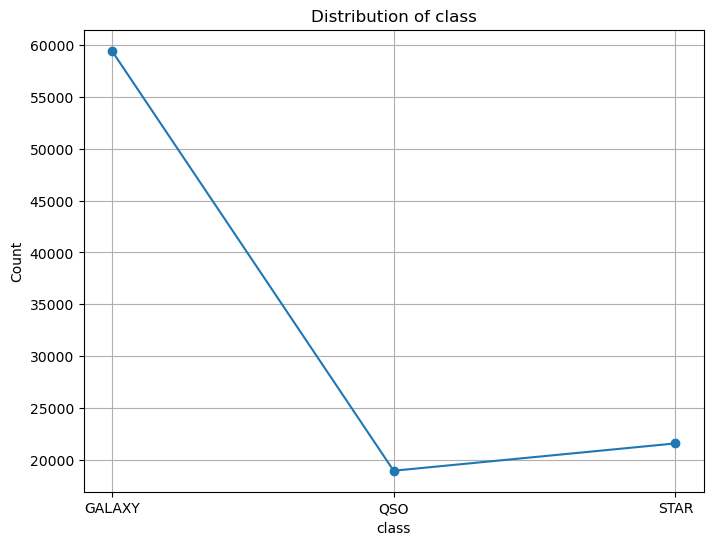

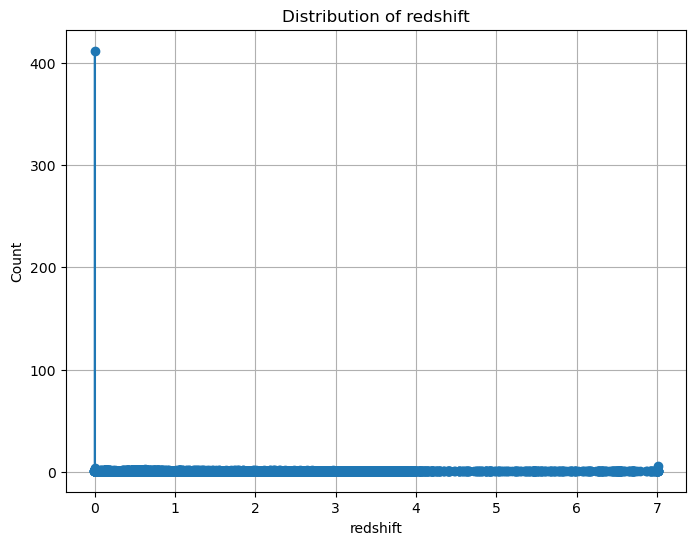

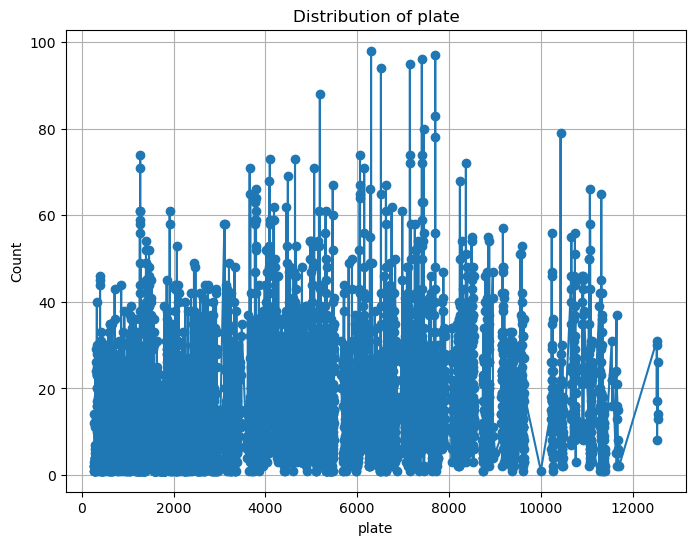

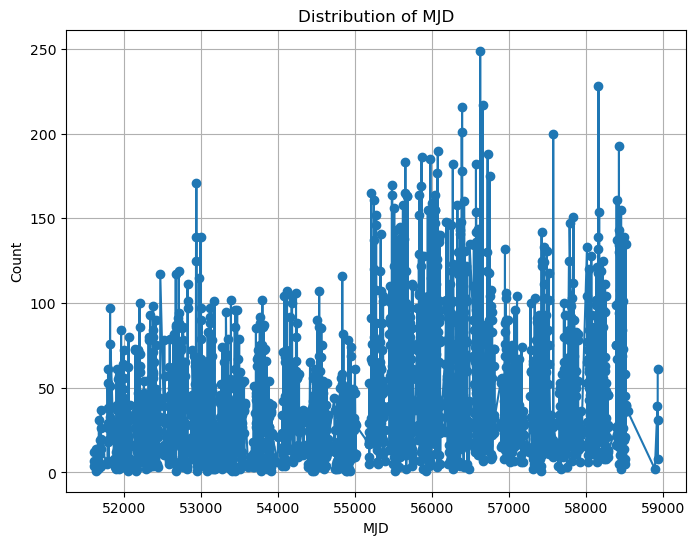

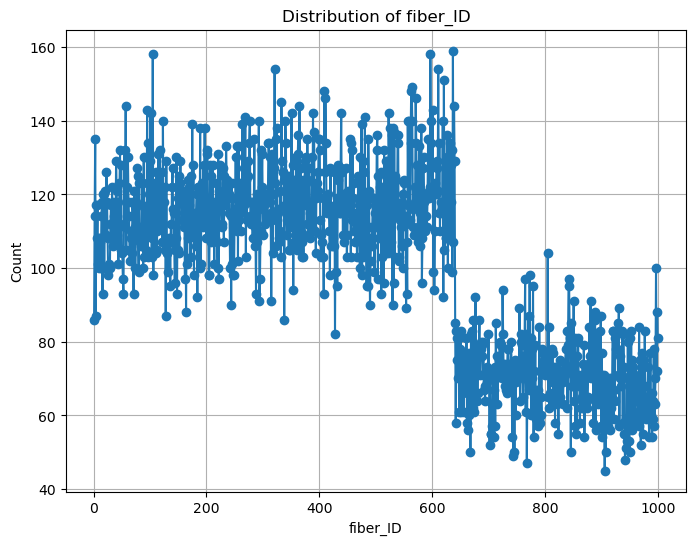

In [6]:
for column_name in dataset.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(dataset[column_name].value_counts().sort_index().index, dataset[column_name].value_counts().sort_index().values, marker='o', linestyle='-')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.grid(True)
    plt.show()

## From this we can see the <b>rerun_ID</b> column is of no use as there is no variance to it
The next step is to drop this column

We also see that there is an ID column and we can delete that as well

In [7]:
dataset.drop('rerun_ID',axis=1)
dataset.drop('spec_obj_ID',axis=1)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,GALAXY,0.455040,6751,56368,470


In [8]:
print(dataset.dtypes)

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object


In [9]:
columns=['plate','MJD','fiber_ID','field_ID','run_ID','cam_col']

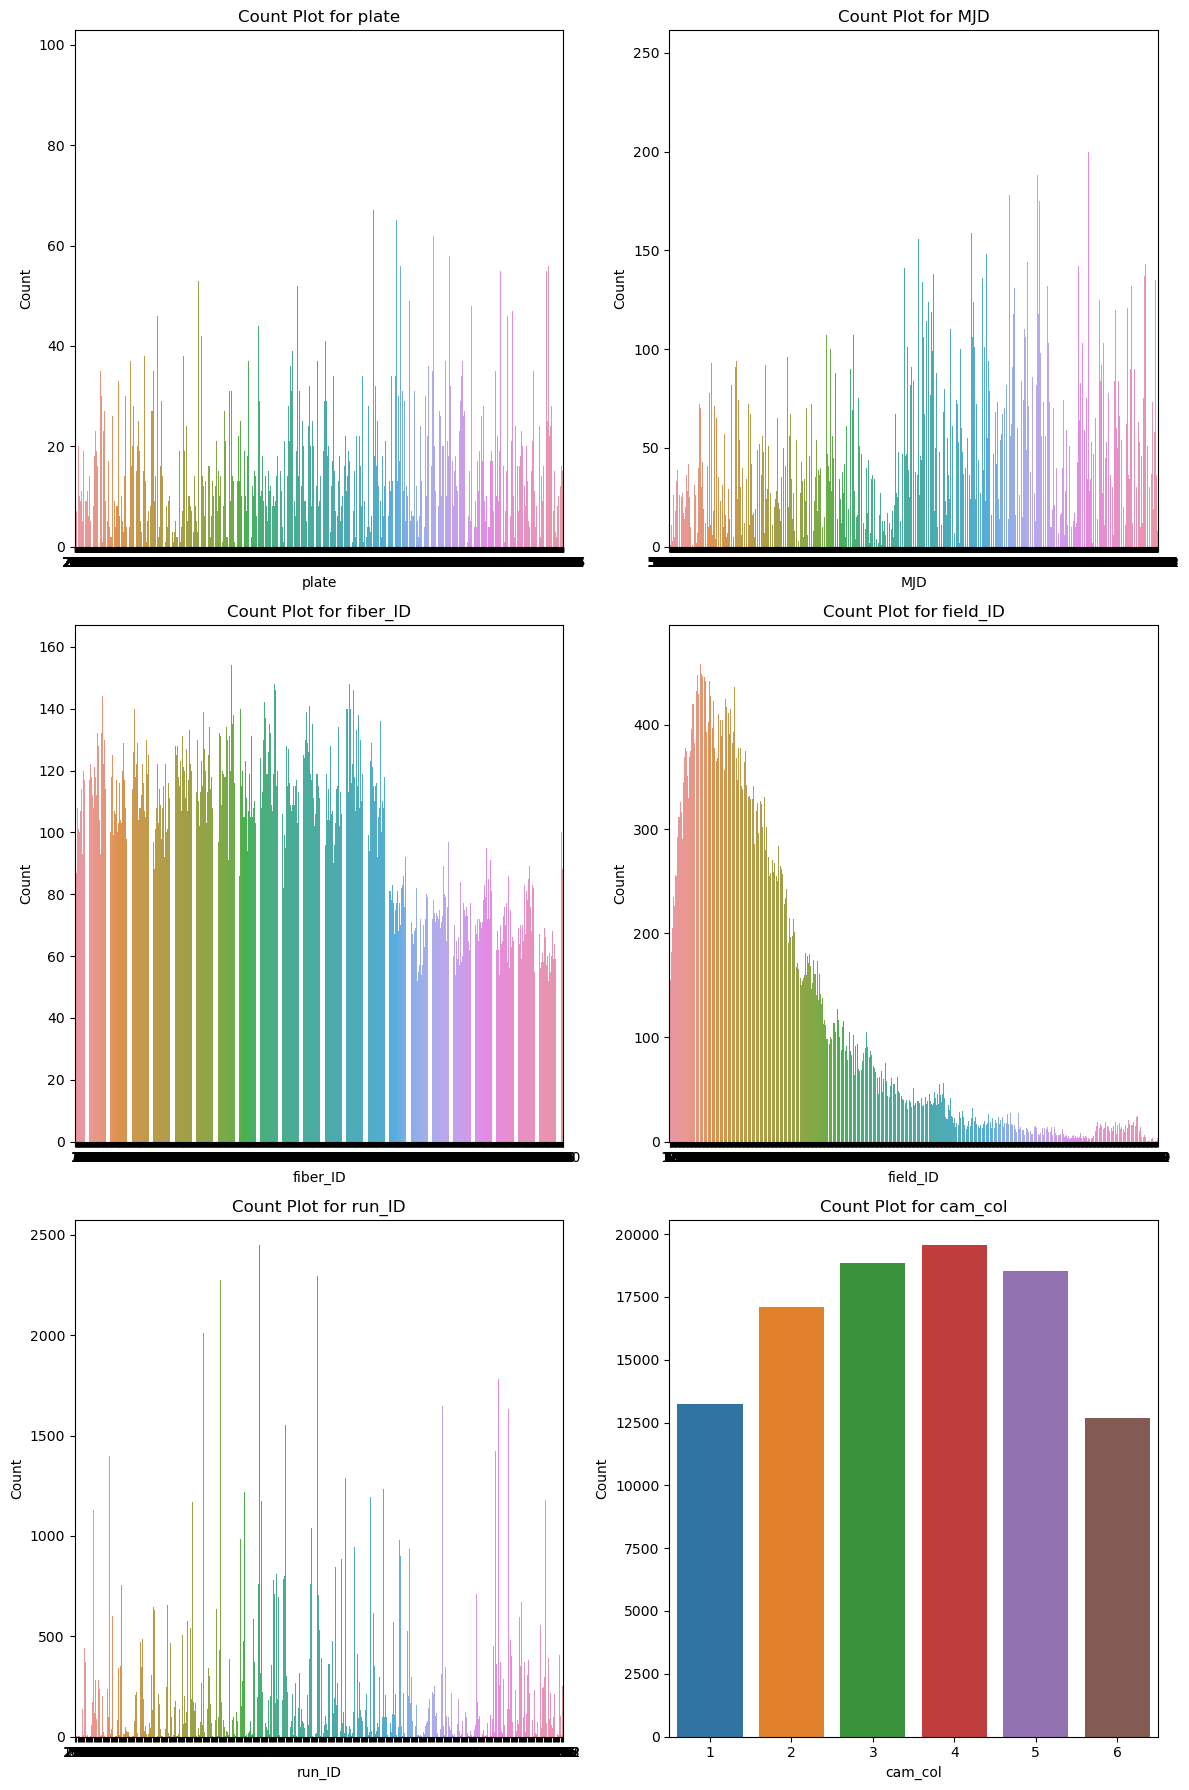

In [10]:
num_columns = len(columns)
num_cols = 2

# Calculate the number of rows needed to accommodate all columns
num_rows = (num_columns + 1) // num_cols

# Set up subplots with a dynamic layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to iterate through it
axes = axes.flatten()

# Loop through columns and create count plots
for i, column in enumerate(columns):
    if i < num_columns:  # Make sure you don't exceed the number of columns
        ax = axes[i]

        # Create a count plot using Seaborn
        sns.countplot(data=dataset, x=column, ax=ax)

        # Set labels and title
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Count Plot for {column}')
    else:
        # If there are more subplots than columns, hide the empty subplots
        axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

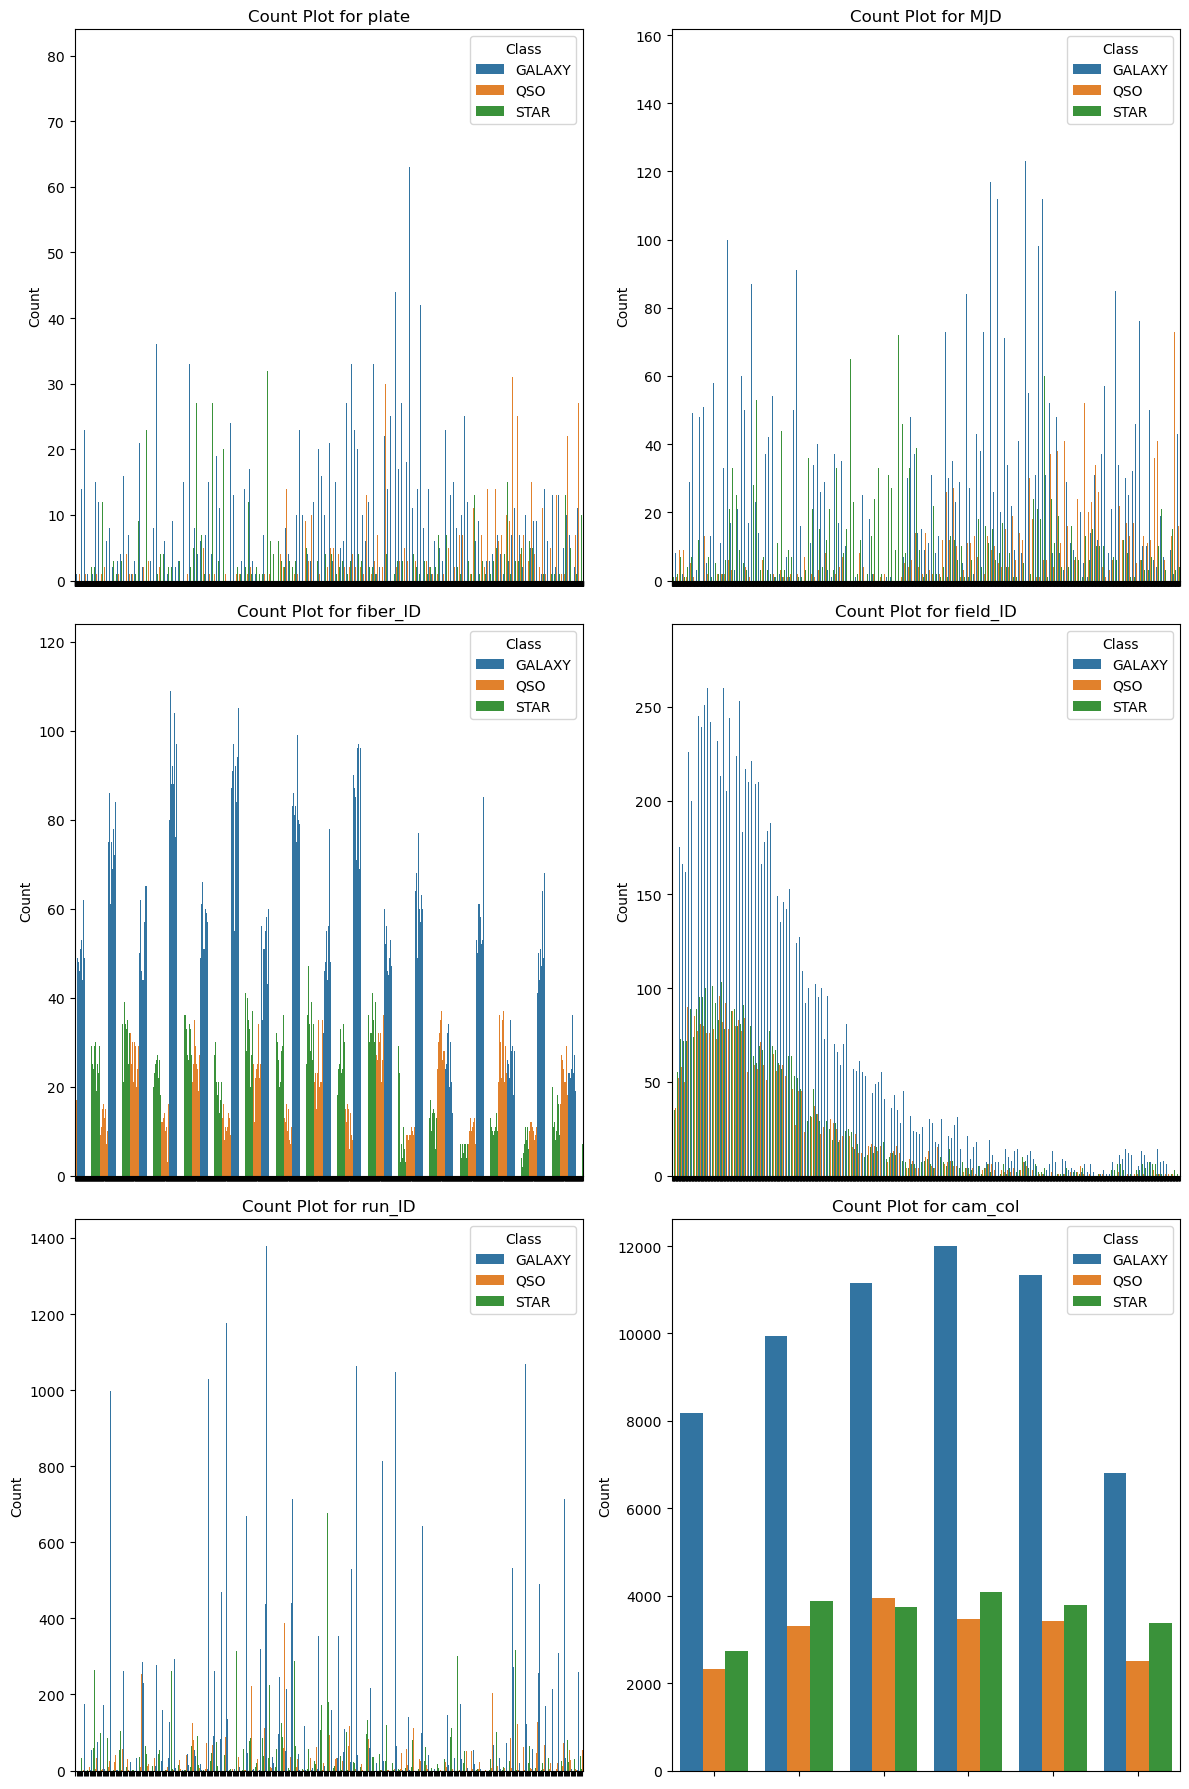

In [11]:
num_columns = len(columns)
num_rows = (num_columns + 1) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))

axes = axes.flatten()

# Loop through columns and create count plots with hue
for i, column in enumerate(columns):
    ax = axes[i]
    
    # Create a count plot using Seaborn with hue
    sns.countplot(data=dataset, x=column, hue='class', ax=ax, dodge=True)
    
    # Remove x-axis labels
    ax.set_xticklabels([])
    
    # Set labels and title
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_title(f'Count Plot for {column}')
    
    # Display legend
    ax.legend(title='Class',loc="upper right")
    
# Hide any remaining empty subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

There is no dicernable pattern present haere, so we cannot group any sections of variables

## 3. Checking for Missing Values

In [12]:
print(dataset.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


### For rows with one or more missing feature values:
#### Delete that datapoint 
  - empty_indices = np.where(dataset[column_to_check].isnull())[0]
  - dataset=dataset.drop(empty_indices)
  
 
#### Use Simple Imputer to Fill in the missing values


    - from sklearn.impute import SimpleImputer
    - imputer = SimpleImputer(missing_value=np.nan,strategy="mean")
    - imputer.fit(dataset[:,Starting Index:Ending Index+1]) #This takes all rows and considers all numerical column indexes
    - dataset[:,Starting Index:Ending Index+1]=imputer.transform(dataset[:,Starting Index:Ending Index+1])

# 4. Encoding Categorical Variables

We have 2 categorical Variables:

1. class
2. cam_col

Since class has 3 outputs and it is the label variable, label encoding is appropriate here

Since cam_col has 6 distint values, One Hot Encoding is appropriate here

In [13]:
le=LabelEncoder()
dataset['class']=le.fit_transform(dataset['class'])

encoder = OneHotEncoder()
new_col=pd.DataFrame(encoder.fit_transform(dataset[['cam_col']]).toarray()) 

dataset = pd.concat([dataset, new_col], axis=1)
dataset.drop('cam_col',axis=1, inplace=True)
print(dataset.columns)

Index([     'obj_ID',       'alpha',       'delta',           'u',
                 'g',           'r',           'i',           'z',
            'run_ID',    'rerun_ID',    'field_ID', 'spec_obj_ID',
             'class',    'redshift',       'plate',         'MJD',
          'fiber_ID',             0,             1,             2,
                   3,             4,             5],
      dtype='object')


# 5. Splitting Data into Training and Testing



In [14]:
y = dataset['class']
X = dataset.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature Scaling

Since the numerical data in X does not follow a normal curve shape, we cannot use Normalisation

The other option is to use Standard Scalar, using the formula: <b> $Z=\frac{X - \mu}{\sigma}$ </b>

* $\mu$ represents the mean from training data
* $\sigma$ represents the standard deviation from the training data

<b>-></b> To calculate mean and standard deviance and update numerical data in X_train, use .fit_transform(X_train)<br>
<b>-></b> To update numerical data in X_test, use.transform(X_test)

In [15]:
print(X_train.iloc[0,:])
print("\n\n")
print(X_train.head())

obj_ID         1.237661e+18
alpha          1.550575e+02
delta          3.947193e+01
u              2.232247e+01
g              2.140113e+01
r              2.051302e+01
i              1.962691e+01
z              1.934791e+01
run_ID         3.704000e+03
rerun_ID       3.010000e+02
field_ID       1.510000e+02
spec_obj_ID    5.136368e+18
redshift       6.598689e-01
plate          4.562000e+03
MJD            5.557000e+04
fiber_ID       4.500000e+01
0              0.000000e+00
1              0.000000e+00
2              0.000000e+00
3              0.000000e+00
4              0.000000e+00
5              1.000000e+00
Name: 75220, dtype: float64



             obj_ID       alpha      delta         u         g         r  \
75220  1.237661e+18  155.057478  39.471934  22.32247  21.40113  20.51302   
48955  1.237679e+18   29.186923  33.102558  25.85486  24.22573  21.48514   
44966  1.237668e+18  143.780304  16.857367  22.62750  21.41766  19.54710   
13568  1.237665e+18  154.753807  34.679618  20.25

In [16]:
print(X_train.columns)
print(len(list(X_train.columns)))

Index([     'obj_ID',       'alpha',       'delta',           'u',
                 'g',           'r',           'i',           'z',
            'run_ID',    'rerun_ID',    'field_ID', 'spec_obj_ID',
          'redshift',       'plate',         'MJD',    'fiber_ID',
                   0,             1,             2,             3,
                   4,             5],
      dtype='object')
22


In [17]:
print(X_train.iloc[0,:22-6])

obj_ID         1.237661e+18
alpha          1.550575e+02
delta          3.947193e+01
u              2.232247e+01
g              2.140113e+01
r              2.051302e+01
i              1.962691e+01
z              1.934791e+01
run_ID         3.704000e+03
rerun_ID       3.010000e+02
field_ID       1.510000e+02
spec_obj_ID    5.136368e+18
redshift       6.598689e-01
plate          4.562000e+03
MJD            5.557000e+04
fiber_ID       4.500000e+01
Name: 75220, dtype: float64


It is clear that all features, except the last 6 need to be scaled, as the last 6 are just binary

In [18]:
sc=StandardScaler()

X_train.iloc[:,:16]=sc.fit_transform(X_train.iloc[:,:16])
print(X_train.iloc[0,:16])

X_test.iloc[:,:16]=sc.fit_transform(X_test.iloc[:,:16])
print(X_test.iloc[:,:16])


/tmp/ipykernel_20/3711857399.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.iloc[:,:16]=sc.fit_transform(X_train.iloc[:,:16])
/tmp/ipykernel_20/3711857399.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.iloc[:,:16]=sc.fit_transform(X_test.iloc[:,:16])


obj_ID        -0.394363
alpha         -0.233606
delta          0.780629
u              0.010235
g              0.025180
r              0.466470
i              0.308291
z              0.019832
run_ID        -0.394520
rerun_ID       0.000000
field_ID      -0.233527
spec_obj_ID   -0.194343
redshift       0.112973
plate         -0.194311
MJD           -0.009503
fiber_ID      -1.483098
Name: 75220, dtype: float64
         obj_ID     alpha     delta         u         g         r         i  \
75721  1.626892 -1.660668 -1.044702  0.565454  0.650683  0.455039  0.295024   
80184 -0.304259  0.642443 -0.917911 -1.873164 -1.882496 -1.733491 -1.577550   
19864  1.629105 -1.516867 -1.169934 -1.726724 -1.832212 -1.738028 -1.613344   
76699  0.418412  0.720186 -0.675660  1.306688  0.533136  0.989812  1.262827   
92991  1.712167 -1.640647 -1.498635  0.757449  0.575039  0.570605  0.653777   
...         ...       ...       ...       ...       ...       ...       ...   
32595  0.178770 -1.253410 -1.252317

## Preprocessing is now done and model can be trained